In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import layers
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

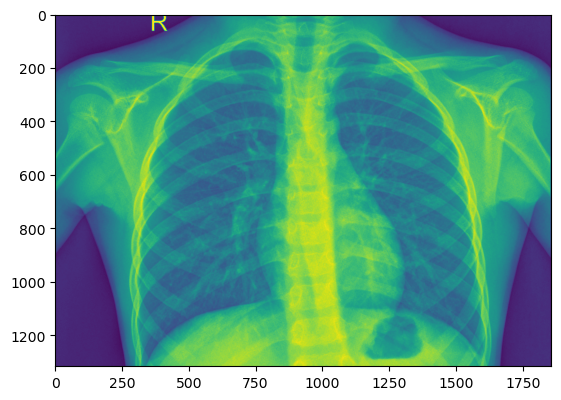

In [3]:
image = imread(r'D:\archive\chest_xray\test\NORMAL\IM-0001-0001.jpeg')
plt.imshow(image)
plt.show()

In [4]:
train_dataset_path = r'D:\archive\chest_xray\train'
test_dataset_path = r'D:\archive\chest_xray\test'
val_dataset_path = r'D:\archive\chest_xray\val'

batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

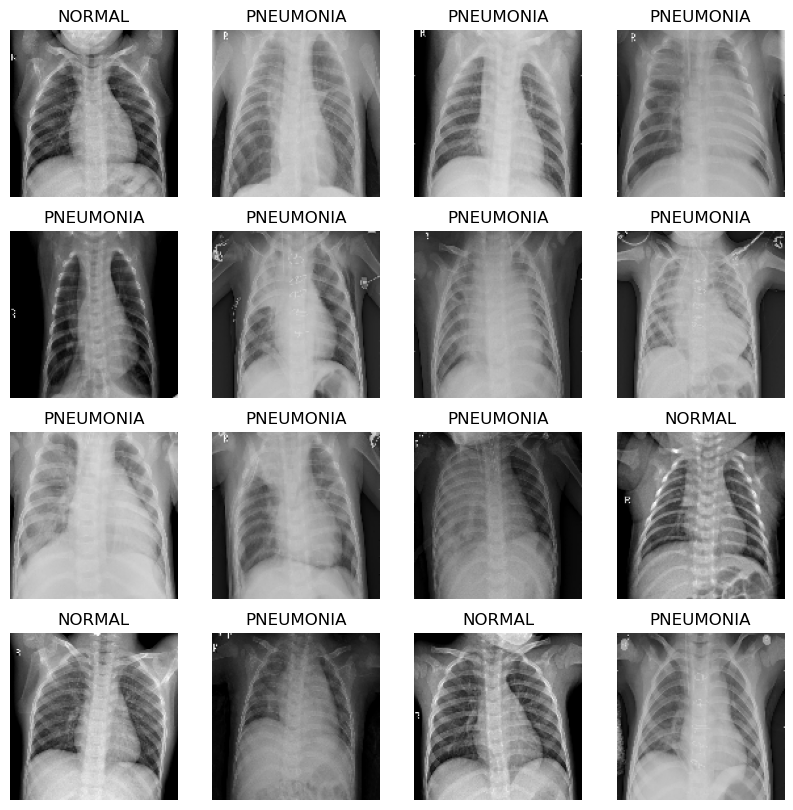

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [9]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(2, activation='softmax')
])


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                 

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


163/163 [==============================] - 43s 195ms/step - loss: 0.4569 - accuracy: 0.7811 - val_loss: 0.4604 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 31s 191ms/step - loss: 0.2652 - accuracy: 0.8919 - val_loss: 0.5291 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 29s 177ms/step - loss: 0.1968 - accuracy: 0.9214 - val_loss: 0.6538 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 29s 176ms/step - loss: 0.1690 - accuracy: 0.9346 - val_loss: 0.2486 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 28s 175ms/step - loss: 0.1561 - accuracy: 0.9410 - val_loss: 0.6358 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 27s 169ms/step - loss: 0.1474 - accuracy: 0.9448 - val_loss: 0.2623 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 29s 180ms/step - loss: 0.1333 - accuracy: 0.9471 - val_loss: 0.5476 - val_

In [13]:
model.evaluate(test_ds)

20/20 [==============================] - 3s 117ms/step - loss: 0.5255 - accuracy: 0.8397


[0.5255023837089539, 0.8397436141967773]